In [1]:
# a. set magic 
%load_ext autoreload
%autoreload 2

# b. load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# c. local modules
from data import child_model

# Read data

In [2]:
# Read data 
with open('carro-mira_new.txt', 'r') as file:
    # Read the content of the file
    content = file.read()

    # Remove spaces and replace with commas
    content_without_spaces = ','.join(content.split())

    # Create DataFrame with separated columns
    num_columns = 25  # Specify the desired number of columns
    data = np.array(content_without_spaces.split(','))
    reshaped_data = np.reshape(data, (-1, num_columns))
    df = pd.DataFrame(reshaped_data)

In [3]:
edu_h = df.iloc[:, 0]          # education of husband
edu_w = df.iloc[:, 1]          # education of wife
age_w_m = df.iloc[:, 2]        # age of wife at the moment of marriage
idx = df.iloc[:, 3]            # couple id
t = df.iloc[:, 4]              # year
age_w = df.iloc[:, 5]          # age of wife
age_h = df.iloc[:, 6]          # age of husband
c_birth_i = df.iloc[:, 7]      # current birth indicator
n_birth_i = df.iloc[:, 8]      # next period birth indicator
x = df.iloc[:, 9]              # number of children
cc = df.iloc[:, 10]            # current contraception choice (1, 2, 3)
p_birth_i = df.iloc[:, 11]     # previous birth indicator
r = df.iloc[:, 12]             # religious couple indicator 
no_c = df.iloc[:, 13]          # no contraception (dummy)
c = df.iloc[:, 14]             # contraception (dummy)
s_c = df.iloc[:, 15]           # sterilization (dummy)
p_c = df.iloc[:, 24]           # previous contraception choice

In [5]:
data = {
        'year': t,
        'edu_h': edu_h,
        'edu_w': edu_w,
        'age_w_m': age_w_m,
        'idx': idx,
        'age_w': age_w,
        'age_h': age_h,
        'c_birth_i': c_birth_i,
        'n_birth_i': n_birth_i,
        'x': x,
        'cc': cc,
        'p_birth_i': p_birth_i,
        'r': r,
        'no_c': no_c,
        'c': c,
        's_c': s_c,
        'p_c': p_c
        }

df_1 = pd.DataFrame(data) 
df_1 = df_1.astype(int)
df_1 = df_1[df_1['cc'] != 3]
# dropper par, som kun optræder 1 gang 
df_1 = df_1.groupby('idx').filter(lambda x: len(x) > 1).reset_index(drop=True).reset_index(drop=True) 
# len(df_1['idx'].unique())

# Education destribution for wife and housband

In [6]:
# Create a cross-tabulation (joint distribution) of edu_h and edu_w
joint_distribution = pd.crosstab(df_1['edu_w'], df_1['edu_h'], normalize=True)*100

# Add row and column sums to joint_distribution
joint_distribution['Sum'] = joint_distribution.sum(axis=1)
joint_distribution.loc['Sum'] = joint_distribution.sum()

# Display the joint distribution with row and column sums
print("Joint Distribution (edu_h x edu_w):")
print(joint_distribution.round(2))

Joint Distribution (edu_h x edu_w):
edu_h     0     1      2      3     4     5     6     Sum
edu_w                                                    
0      1.35  0.30   3.40   0.23  0.00  0.13  0.00    5.41
1      0.82  1.60  15.24   2.18  0.20  0.22  0.04   20.30
2      1.24  5.08  31.07   9.48  1.37  2.38  0.15   50.77
3      0.09  0.96   4.51   3.91  0.86  2.30  0.00   12.63
4      0.04  0.19   1.25   1.18  1.36  2.03  0.06    6.11
5      0.00  0.08   0.59   0.78  0.53  2.11  0.29    4.38
6      0.00  0.00   0.00   0.11  0.05  0.17  0.08    0.41
Sum    3.54  8.21  56.06  17.87  4.36  9.34  0.62  100.00


## Table 3: Age, parity, birth rate and contraceptive use; time series of sample means

In [7]:
# Grouping the data by time (assuming you have a 'year' column)
df_2 = df_1.copy()
grouped_data = df_2.groupby('year')

# Calculating the mean for age, parity, birth rate, and contraceptive use
mean_age = grouped_data['age_w'].mean()
mean_parity = grouped_data['x'].mean()
mean_birth_rate = grouped_data['c_birth_i'].mean()
mean_contraceptive_use = grouped_data['c'].mean()

# Calculating the standard deviation for age, parity, birth rate, and contraceptive use
std_age = grouped_data['age_w'].std()
std_parity = grouped_data['x'].std()
std_birth_rate = grouped_data['c_birth_i'].std()
std_contraceptive_use = grouped_data['c'].std()

# Calculating the count of observations for each year
count_observations = grouped_data['idx'].count()

# Creating a DataFrame to store the time series of sample means and standard deviations
time_series_means = pd.DataFrame({
    'Obs'        : count_observations,
    'Mean Age'   : mean_age.round(2),
    'Mean Parity': mean_parity.round(2),
    'Birth Rate' : mean_birth_rate.round(3),
    'Contracept' : (mean_contraceptive_use * 100).round(2)
})

# Adding standard deviation as parentheses to column values
time_series_means['Birth Rate'] = time_series_means['Birth Rate'].round(3).astype(str)
time_series_means['Mean Age'] = time_series_means['Mean Age'].round(2).astype(str) + ' (' + std_age.round(2).astype(str) + ')'
time_series_means['Mean Parity'] = time_series_means['Mean Parity'].round(2).astype(str) + ' (' + std_parity.round(2).astype(str) + ')'
time_series_means['Contracept'] = time_series_means['Contracept'].round(2).astype(str) + '%'

print(time_series_means.style.to_latex())


# Displaying the time series of sample means with standard deviation in parentheses
# print(time_series_means)

\begin{tabular}{lrllll}
 & Obs & Mean Age & Mean Parity & Birth Rate & Contracept \\
year &  &  &  &  &  \\
83 & 313 & 24.72 (4.52) & 1.16 (1.14) & 0.655 & 54.63% \\
84 & 1570 & 28.51 (5.15) & 1.47 (1.04) & 0.12 & 68.73% \\
85 & 1759 & 28.92 (5.37) & 1.5 (1.07) & 0.126 & 70.44% \\
86 & 1861 & 29.43 (5.45) & 1.52 (1.05) & 0.118 & 73.29% \\
87 & 1958 & 29.96 (5.62) & 1.52 (1.04) & 0.098 & 73.7% \\
88 & 2064 & 30.42 (5.84) & 1.52 (1.04) & 0.092 & 74.08% \\
89 & 2160 & 30.86 (6.04) & 1.51 (1.04) & 0.096 & 74.72% \\
90 & 2269 & 31.31 (6.24) & 1.51 (1.03) & 0.09 & 75.76% \\
91 & 2285 & 31.63 (6.16) & 1.49 (1.01) & 0.081 & 76.41% \\
92 & 2285 & 31.9 (6.01) & 1.47 (0.99) & 0.081 & 76.32% \\
93 & 2184 & 32.64 (5.83) & 1.55 (0.94) & 0.094 & 79.08% \\
\end{tabular}



# Table 4: Sample birth frequencies by wife’s age (%)

Den viser ikke det samme som deres (hjælp fra caro) 

Vi ser på c_birth_i givet at de ikke contracepter, hvoraf om de fik et barn i sidste periode eller ej, og så om de contracepter

In [8]:
# Define the age group bins and labels
age_bins = [0, 25, 30, 35, 40, 45]
age_labels = ['18-24', '25-29', '30-34', '35-39','40-44']

df_2 = df_1.copy()
df_2['age_group'] = pd.cut(df_2['age_w'], bins=age_bins, labels=age_labels, right=False)


df_2_c_birth = df_2[df_2['n_birth_i'] == 1].reset_index(drop=True)

df_2_p = df_2_c_birth.groupby(['age_group', 'c', 'c_birth_i']).size()

df_2_all = df_2.groupby(['age_group', 'c', 'c_birth_i']).size()
# print(df_2_all)

# print(df_2_p_all)
df_p = df_2_p/df_2_all * 100
df_p = df_p.reset_index(name= 'p')
df_p_p = df_p.pivot_table(index='age_group', columns=['c', 'c_birth_i'], values=df_p)
# print(df_p_p)

formatted_table = df_p_p.applymap('{:.2f}'.format)

# print(formatted_table.style.to_latex(caption='Births by age group and contraceptive use'))

# print(df_p)


df_2_p_all = df_2_c_birth.groupby(['c', 'c_birth_i']).size()

df_2_all_all = df_2.groupby(['c', 'c_birth_i']).size()

df_p_all = df_2_p_all/df_2_all_all * 100
df_p_all = df_p_all.reset_index(name= 'p')
print(df_p_all)
# df_p_all_p = df_p_all.pivot_table(index='', columns=['c', 'c_birth_i'], values=df_p_all)



   c  c_birth_i          p
0  0          0  43.517272
1  0          1   8.800000
2  1          0   2.534169
3  1          1   2.411454


## Figure 1: Proportion of couples contracepting, by age and parity

Denne er ikke som deres (hjælp fra caro) 

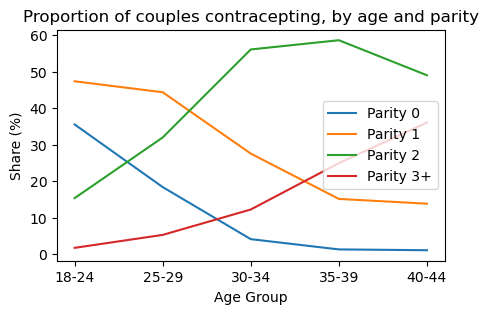

In [9]:
# Define the age group bins and labels
age_bins = [0, 25, 30, 35, 40, 45]
age_labels = ['18-24', '25-29', '30-34', '35-39','40-44']

# copy the data
df_3 = df_1.copy()

# Create a new column 'age_group' in df_1 based on age bins
df_3['age_group'] = pd.cut(df_3['age_w'], bins=age_bins, labels=age_labels, right=False)

# Define the parity groups
parity_groups = ['0', '1', '2', '3+']

# Filter the data for non-sterilized couples
df_3 = df_3[df_3['cc'] == 2].reset_index(drop=True)

# Sum the groups where parity is greater than 3 and represent it as "3+"
df_3.loc[df_3['x'] >= 3, 'x'] = '3+'

grouped_data = df_3.groupby(['age_group', 'x']).count()[['idx']]
# print(grouped_data)
age_grouped = df_3.groupby(['age_group']).count()[['idx']]
# print(age_grouped)

grouped_data_share = grouped_data/age_grouped * 100

# Reset the index of the DataFrame
grouped_data_share = grouped_data_share.reset_index()

# Rename the column to 'Share'
grouped_data_share = grouped_data_share.rename(columns={'idx': 'Share'})

grouped_data_share_0 = grouped_data_share[grouped_data_share['x'] == 0]
grouped_data_share_1 = grouped_data_share[grouped_data_share['x'] == 1]
grouped_data_share_2 = grouped_data_share[grouped_data_share['x'] == 2]
grouped_data_share_3 = grouped_data_share[grouped_data_share['x'] == '3+']

plt.figure(figsize=(5, 3))
plt.plot(grouped_data_share_0['age_group'], grouped_data_share_0['Share'], label=f'Parity 0')
plt.plot(grouped_data_share_1['age_group'], grouped_data_share_1['Share'], label=f'Parity 1')    
plt.plot(grouped_data_share_2['age_group'], grouped_data_share_2['Share'], label=f'Parity 2')
plt.plot(grouped_data_share_3['age_group'], grouped_data_share_3['Share'], label=f'Parity 3+')

plt.xlabel('Age Group')
plt.ylabel('Share (%)')
plt.title('Proportion of couples contracepting, by age and parity')
plt.legend()
plt.show()

# # Save the figure as an image file
# plt.savefig('figure.png', dpi=300)  # Change the file extension to save as a different image format

# # Alternatively, save the figure as a PDF file
# plt.savefig('figure.pdf', bbox_inches='tight')

# # Close the figure to free up memory
# plt.close()

# \begin{figure}
#     \centering
#     \includegraphics[width=0.8\textwidth]{figure.png}  % Replace 'figure.png' with the actual filename
#     \caption{Proportion of non-sterilized couples contracepting, by age and parity}
#     \label{fig:proportion}
# \end{figure}

## Table 5: Contraceptive actions by age and parity (%)

In [13]:
# Define the age group bins and labels
age_bins = [0, 25, 30, 35, 40, 45]
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44']

df_5 = df_1.copy()

# Create a new column 'age_group' in df_1 based on age bins
df_5['age_group'] = pd.cut(df_5['age_w'], bins=age_bins, labels=age_labels, right=False)

# Define the parity groups
parity_groups = ['0', '1', '2', '3+']

df_5.loc[df_1['x'] >= 3, 'x'] = '3+'

# Contraceptive actions by age and parity (%)

df_1_ca_sum = df_5.groupby(['x', 'age_group']).count()['idx']
df_1_ca_sum = df_1_ca_sum.reset_index()

df_1_no_c = df_5[df_5['cc'] == 1]
df_1_ca_no_c = df_1_no_c.groupby(['x', 'age_group']).count()['idx']
df_1_ca_no_c = df_1_ca_no_c.reset_index()
df_1_ca_no_c.columns = ['x', 'age_group', 'No Contraception']

df_1_c = df_5[df_5['cc'] == 2]
df_1_ca_c = df_1_c.groupby(['x', 'age_group']).count()['idx']
df_1_ca_c = df_1_ca_c.reset_index()
df_1_ca_c.columns = ['x', 'age_group', 'Contraception']

data_ca = pd.merge(pd.merge(df_1_ca_no_c, df_1_ca_c, on=['x', 'age_group'], how='right'), df_1_ca_sum, on=['x', 'age_group'], how='right')

data_ca['No Contraception (%)'] = ((data_ca['No Contraception'] / data_ca['idx']) * 100).round(2)
data_ca['Contraception (%)'] = ((data_ca['Contraception'] / data_ca['idx']) * 100).round(2)

data_ca_final = data_ca[['x', 'age_group', 'No Contraception (%)', 'Contraception (%)']]
data_ca_final.columns = ['Parity', 'Age Group', 'No Contraception (%)', 'Contraception (%)']

formatted_table = data_ca_final.copy()
formatted_table[['No Contraception (%)', 'Contraception (%)']] = formatted_table[['No Contraception (%)', 'Contraception (%)']].applymap('{:.2f}'.format)

# Convert formatted table to LaTeX table format with lines between x groups
latex_table = formatted_table.style.hide(axis='index').to_latex(caption='Contraceptive Actions by Age and Parity (%)', label='tab:contraceptive-actions')

# print(latex_table)

In [39]:
data_ca_final_0 = data_ca_final[data_ca_final['Parity'] == 0]
data_ca_final_1 = data_ca_final[data_ca_final['Parity'] == 1]
data_ca_final_2 = data_ca_final[data_ca_final['Parity'] == 2]
data_ca_final_3 = data_ca_final[data_ca_final['Parity'] == '3+']

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(7, 3.5))
plt.plot(data_ca_final_0['Age Group'], data_ca_final_0['Contraception (%)'], label=f'Parity 0', color='lightblue')
plt.plot(data_ca_final_1['Age Group'], data_ca_final_1['Contraception (%)'], label=f'Parity 1', color='royalblue')
plt.plot(data_ca_final_2['Age Group'], data_ca_final_2['Contraception (%)'], label=f'Parity 2', color='mediumblue')
plt.plot(data_ca_final_3['Age Group'], data_ca_final_3['Contraception (%)'], label=f'Parity 3+', color='navy')

plt.xlabel('Age group')
plt.ylabel('Contraception share (%)')
plt.legend(ncol = 4, loc=(0.08, -0.26), frameon=False)
plt.ylim(20, 90)
plt.yticks(np.arange(20, 91, 10))
plt.grid(axis='y', c = 'lightgrey', linestyle='--', linewidth=0.5)
# plt.show();

plt.savefig('Figure 1.png', format = 'png',  bbox_inches='tight')
plt.close()

## Table 7: Contraceptive choices, transition probabilities

In [40]:
# Note: These sample statistics are calculated for couples whose education level is less than high school (both husband and wife); 
# the couple has R = 0 (not religious) and married when the wife was between 20 and 24 years old. 
# Periods t with a birth (b_t = 1) are excluded.

df_6 = df_1.copy()

df_6.loc[df_6['x'] >= 3, 'x'] = '3+'

df_6 = df_6[df_6['c_birth_i'] == 0]

def contraceptive_transition(df, parity):
    # Find the lagged values of x and cc
    df['x_shifted'] = df.groupby('idx')['x'].shift(-1)
    df['cc_shifted'] = df.groupby('idx')['cc'].shift(-1)

    # Filter for given parity at t and t + 1
    df_pivot = df[(df['x'] == parity) & (df['x_shifted'] == parity)]

    # Group by contraception choice at t and t + 1
    grouped = df_pivot.groupby(['cc', 'cc_shifted']).size().reset_index(name='Count')

    # Calculate transition probabilities
    grouped['Transition Probability'] = grouped.groupby('cc')['Count'].apply(lambda x: x / x.sum())

    # Drop the Count column (optional)
    grouped = grouped.drop('Count', axis=1)

    # Create pivot table
    pivot_table = grouped.pivot(index='cc', columns='cc_shifted', values='Transition Probability')

    # Add row above column names
    pivot_table.columns = ['No Contraception', 'Contracept']
    pivot_table.columns = pd.MultiIndex.from_arrays([['Action at time t + 1', ''], pivot_table.columns])

    # Add column to the left of index names
    pivot_table.index = ['No Contraception', 'Contracept']
    pivot_table.index = pd.MultiIndex.from_tuples([('Action at time t', 'No Contraception'), (' ', 'Contracept')])

    # pivot_table = pivot_table.set_index(['Action at time t', pivot_table.index]).rename_axis(['',''])
    # pivot_table.insert(0, ('Action at time t', ''), '')

    pivot_table = (pivot_table * 100).round(2)

    # Format pivot table values to two decimal places
    formatted_table = pivot_table.applymap('{:.2f}'.format)

    # Convert pivot table to LaTeX table format
    latex_table = formatted_table.style.to_latex()
    
    return latex_table


In [42]:
# parity = 0
latex_table = contraceptive_transition(df_6, 0)
print(latex_table)

\begin{tabular}{llll}
 &  & Action at time t + 1 &  \\
 &  & No Contraception & Contracept \\
Action at time t & No Contraception & 85.11 & 14.89 \\
  & Contracept & 33.10 & 66.90 \\
\end{tabular}



In [43]:
# parity = 1
latex_table = contraceptive_transition(df_6, 1)
print(latex_table)

\begin{tabular}{llll}
 &  & Action at time t + 1 &  \\
 &  & No Contraception & Contracept \\
Action at time t & No Contraception & 94.41 & 5.59 \\
  & Contracept & 15.44 & 84.56 \\
\end{tabular}



In [46]:
# parity = 2
latex_table = contraceptive_transition(df_6, 2)
print(latex_table)

\begin{tabular}{llll}
 &  & Action at time t + 1 &  \\
 &  & No Contraception & Contracept \\
Action at time t & No Contraception & 93.92 & 6.08 \\
  & Contracept & 2.18 & 97.82 \\
\end{tabular}



In [45]:
# parity = 2
latex_table = contraceptive_transition(df_6, '3+')
print(latex_table)

\begin{tabular}{llll}
 &  & Action at time t + 1 &  \\
 &  & No Contraception & Contracept \\
Action at time t & No Contraception & 89.94 & 10.06 \\
  & Contracept & 2.30 & 97.70 \\
\end{tabular}



## Figure 3: Sample proportion of couples still contracepting, by duration of birth interval

In [362]:
df_7 = df_1.copy()

df_7.loc[df_7['x'] >= 3, 'x'] = '3+'

df_7_c = df_7[df_7['cc'] == 2].reset_index(drop=True)
df_7_c_grouped = df_7_c.groupby(['x']).size()
print(df_7_c_grouped)

df_7_grouped = df_7.groupby(['x']).size()
print(df_7_grouped)

share_c = (df_7_c_grouped / df_7_grouped*100).round(2)
print(share_c)

x
0     1806
1     4825
2     6666
3+    2078
dtype: int64
x
0     3550
1     6777
2     7793
3+    2588
dtype: int64
x
0    50.87
1    71.20
2    85.54
3+   80.29
dtype: float64


In [375]:
# Assuming you have a DataFrame named df_1 with 'year' columns
df_7 = df_1.copy()

df_7.loc[df_7['x'] >= 3, 'x'] = '3+'

# Assuming 'year' is the column indicating the year
years = df_7['year'].unique()

# Create an empty DataFrame to store the results for each year
results = pd.DataFrame(columns=['Year', 'Group', 'Count', 'Share'])

# Iterate over each year
for year in years:
    df_7_year = df_7[df_7['year'] == year].reset_index(drop=True)
    df_7_c_year = df_7_year[df_7_year['cc'] == 2].reset_index(drop=True)
    df_7_c_grouped_year = df_7_c_year.groupby(['x']).size()
    df_7_grouped_year = df_7_year.groupby(['x']).size()
    
    share_c_year = (df_7_c_grouped_year / df_7_grouped_year * 100).round(2)
    
    # Append the results for the current year to the results DataFrame
    for group, count, share in zip(share_c_year.index, df_7_c_grouped_year, share_c_year):
        results = results.append({'Year': year, 'Group': group, 'Count': count, 'Share': share}, ignore_index=True)

# Print the results
# print(results)

results = results.sort_values('Year')

unique_groups = results['Group'].unique()
unique_groups = pd.Series(unique_groups).sort_values(ascending=True, key=lambda x: int(x.replace('+', '')) if '+' in x else int(x))


for g in unique_groups:
    plt.plot(results[results['Group'] == g]['Year'], results[results['Group'] == g]['Share'], label=g)


# for g in results['Group']:
#     plt.plot(results[results['Group'] == g]['Year'], results[results['Group'] == g]['Share'], label=g)

plt.xlabel('Year')
plt.ylabel('Share of Contraception')
plt.title('Share of Contraception by Parity')
plt.legend()



/var/folders/_0/__2l_zk5425dbzpq1s84wr8r0000gn/T/ipykernel_68730/507136706.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Year': year, 'Group': group, 'Count': count, 'Share': share}, ignore_index=True)
/var/folders/_0/__2l_zk5425dbzpq1s84wr8r0000gn/T/ipykernel_68730/507136706.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Year': year, 'Group': group, 'Count': count, 'Share': share}, ignore_index=True)
/var/folders/_0/__2l_zk5425dbzpq1s84wr8r0000gn/T/ipykernel_68730/507136706.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Year': year, 'Group': group, 'Count': count, 'Share': share}, ignore_index=True)
/var/folders/_0/__2l_zk54

TypeError: cannot convert the series to <class 'int'>

In [437]:
df_8 = df_1.copy()

df_8.loc[df_8['x'] >= 3, 'x'] = '3+'

df_8_c = df_8[df_8['cc'] == 1].reset_index(drop=True)
df_8_noc = df_8[df_8['cc'] == 2].reset_index(drop=True)

df_8_c_age = df_8_c.groupby(['age_w', 'c_birth_i']).count()['idx'].reset_index(name='count_c') 
df_8_noc_age = df_8_noc.groupby(['age_w', 'c_birth_i']).count()['idx'].reset_index(name='count_noc')

df_8_age = df_8.groupby(['age_w', 'c_birth_i']).count()['idx'].reset_index(name='count_all')

data_8 = pd.merge(pd.merge(df_8_c_age, df_8_noc_age, on = ['age_w', 'c_birth_i'], how = 'left'), df_8_age, on = ['age_w', 'c_birth_i'], how = 'left')

data_8['c'] = data_8['count_c'] / data_8['count_all'] * 100
data_8['noc'] = data_8['count_noc'] / data_8['count_all'] * 100

data_8 = data_8[['age_w', 'c_birth_i', 'c', 'noc']]

data_8['c_birth_i'] = data_8['c_birth_i'].astype(str) 

data_8_p_c = data_8.pivot(index='age_w', columns='c_birth_i', values='c')
data_8_p_no = data_8.pivot(index='age_w', columns='c_birth_i', values='noc')
data_8_together = pd.merge(data_8_p_c, data_8_p_no, on = 'age_w', how = 'right').reset_index()
data_8_together.columns = ['Age wife', '(no birth, contracept)', '(birth, contracept)', '(no birth, not contrapeting)', '(birth, notcontrapepting)']
data_8_together = data_8_together[['Age wife', '(birth, contracept)', '(birth, notcontrapepting)', '(no birth, contracept)', '(no birth, not contrapeting)']]

format_percentage = lambda x: '{:.2f}'.format(x)

# Apply formatting to all columns except the first one
for col in data_8_together.iloc[1:]:
    data_8_together[col] = data_8_together[col].apply(format_percentage)

formatted_table = data_8_together

print(formatted_table.style.hide(axis = 'index').to_latex())

\begin{tabular}{lllll}
Age wife & (birth, contracept) & (birth, notcontrapepting) & (no birth, contracept) & (no birth, not contrapeting) \\
15.00 & nan & nan & 85.71 & 14.29 \\
16.00 & 57.14 & 42.86 & 50.00 & 50.00 \\
17.00 & 65.00 & 35.00 & 57.69 & 42.31 \\
18.00 & 45.83 & 54.17 & 50.59 & 49.41 \\
19.00 & 33.93 & 66.07 & 41.79 & 58.21 \\
20.00 & 51.52 & 48.48 & 29.90 & 70.10 \\
21.00 & 47.30 & 52.70 & 33.82 & 66.18 \\
22.00 & 37.50 & 62.50 & 30.43 & 69.57 \\
23.00 & 39.32 & 60.68 & 31.91 & 68.09 \\
24.00 & 42.77 & 57.23 & 31.32 & 68.68 \\
25.00 & 37.22 & 62.78 & 28.56 & 71.44 \\
26.00 & 41.44 & 58.56 & 28.46 & 71.54 \\
27.00 & 46.88 & 53.12 & 28.46 & 71.54 \\
28.00 & 36.21 & 63.79 & 28.24 & 71.76 \\
29.00 & 34.48 & 65.52 & 26.97 & 73.03 \\
30.00 & 39.62 & 60.38 & 23.63 & 76.37 \\
31.00 & 46.15 & 53.85 & 21.30 & 78.70 \\
32.00 & 31.07 & 68.93 & 20.62 & 79.38 \\
33.00 & 33.75 & 66.25 & 18.73 & 81.27 \\
34.00 & 32.81 & 67.19 & 18.46 & 81.54 \\
35.00 & 31.91 & 68.09 & 18.64 & 81.36 \\
36

In [438]:
df_8 = df_1.copy()

df_8.loc[df_8['x'] >= 3, 'x'] = '3+'

df_8_c = df_8[df_8['cc'] == 1].reset_index(drop=True)
df_8_noc = df_8[df_8['cc'] == 2].reset_index(drop=True)

df_8_c_age = df_8_c.groupby(['age_w', 'c_birth_i']).count()['idx'].reset_index(name='count_c') 
df_8_noc_age = df_8_noc.groupby(['age_w', 'c_birth_i']).count()['idx'].reset_index(name='count_noc')

df_8_age = df_8.groupby(['age_w']).count()['idx'].reset_index(name='count_all')

data_8 = pd.merge(pd.merge(df_8_c_age, df_8_noc_age, on = ['age_w', 'c_birth_i'], how = 'left'), df_8_age, on = ['age_w'], how = 'left')

data_8['c'] = data_8['count_c'] / data_8['count_all'] * 100
data_8['noc'] = data_8['count_noc'] / data_8['count_all'] * 100

data_8 = data_8[['age_w', 'c_birth_i', 'c', 'noc']]

data_8['c_birth_i'] = data_8['c_birth_i'].astype(str) 

data_8_p_c = data_8.pivot(index='age_w', columns='c_birth_i', values='c')
data_8_p_no = data_8.pivot(index='age_w', columns='c_birth_i', values='noc')
data_8_together = pd.merge(data_8_p_c, data_8_p_no, on = 'age_w', how = 'right').reset_index()
data_8_together.columns = ['Age wife', '(no birth, contracept)', '(birth, contracept)', '(no birth, not contrapeting)', '(birth, notcontrapepting)']
data_8_together = data_8_together[['Age wife', '(birth, contracept)', '(birth, notcontrapepting)', '(no birth, contracept)', '(no birth, not contrapeting)']]

format_percentage = lambda x: '{:.2f}'.format(x)

# Apply formatting to all columns except the first one
for col in data_8_together.iloc[1:]:
    data_8_together[col] = data_8_together[col].apply(format_percentage)

formatted_table = data_8_together

print(formatted_table.style.hide(axis = 'index').to_latex())

\begin{tabular}{lllll}
Age wife & (birth, contracept) & (birth, notcontrapepting) & (no birth, contracept) & (no birth, not contrapeting) \\
15.00 & nan & nan & 85.71 & 14.29 \\
16.00 & 21.05 & 15.79 & 31.58 & 31.58 \\
17.00 & 28.26 & 15.22 & 32.61 & 23.91 \\
18.00 & 10.09 & 11.93 & 39.45 & 38.53 \\
19.00 & 10.00 & 19.47 & 29.47 & 41.05 \\
20.00 & 12.59 & 11.85 & 22.59 & 52.96 \\
21.00 & 8.39 & 9.35 & 27.82 & 54.44 \\
22.00 & 6.22 & 10.36 & 25.39 & 58.03 \\
23.00 & 5.94 & 9.16 & 27.10 & 57.81 \\
24.00 & 7.91 & 10.58 & 25.53 & 55.98 \\
25.00 & 6.05 & 10.20 & 23.92 & 59.84 \\
26.00 & 6.25 & 8.83 & 24.17 & 60.75 \\
27.00 & 6.93 & 7.85 & 24.25 & 60.97 \\
28.00 & 4.85 & 8.54 & 24.46 & 62.15 \\
29.00 & 4.61 & 8.76 & 23.37 & 63.26 \\
30.00 & 5.04 & 7.67 & 20.62 & 66.67 \\
31.00 & 4.53 & 5.29 & 19.21 & 70.97 \\
32.00 & 2.82 & 6.25 & 18.75 & 72.18 \\
33.00 & 2.59 & 5.09 & 17.29 & 75.02 \\
34.00 & 2.19 & 4.49 & 17.22 & 76.10 \\
35.00 & 1.70 & 3.62 & 17.65 & 77.04 \\
36.00 & 1.81 & 3.50 & 16.43 &

In [468]:
import pandas as pd

result_df = pd.DataFrame(columns=['t', 'p1', 'p2'])

for t in range(18, 45):
    datad0 = df_1[(df_1['c'] == 0) & (df_1['age_w'] == t)]
    datad1 = df_1[(df_1['c'] == 1) & (df_1['age_w'] == t)]

    tabulate0 = datad0['n_birth_i'].value_counts()  # Count number of observations for each c_birth_i
    tabulate1 = datad1['n_birth_i'].value_counts()
    for i in range(tabulate0.size - 1):
        p1 = tabulate0[i] / sum(tabulate0) * 100
        p2 = tabulate1[i] / sum(tabulate1) * 100

    result_df = result_df.append({'t': t, 'p1': p1, 'p2': p2}, ignore_index=True)

formatted_table = result_df.loc[:,['p1', 'p2']].applymap('{:.2f}'.format)
formatted_table_t = result_df.loc[:,['t']].applymap('{:.0f}'.format)
result_df = pd.concat([formatted_table_t, formatted_table], axis=1)

# Convert pivot table to LaTeX table format
latex_table = result_df.style.hide(axis = 'index').to_latex()

print(latex_table)

/var/folders/_0/__2l_zk5425dbzpq1s84wr8r0000gn/T/ipykernel_68730/3245444595.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'t': t, 'p1': p1, 'p2': p2}, ignore_index=True)
/var/folders/_0/__2l_zk5425dbzpq1s84wr8r0000gn/T/ipykernel_68730/3245444595.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'t': t, 'p1': p1, 'p2': p2}, ignore_index=True)
/var/folders/_0/__2l_zk5425dbzpq1s84wr8r0000gn/T/ipykernel_68730/3245444595.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'t': t, 'p1': p1, 'p2': p2}, ignore_index=True)
/var/folders/_0/__2l_zk5425dbzpq1s84wr8r0000gn/T/ipykernel_68730/3245444595.py:15: FutureWarning: The frame.appe

\begin{tabular}{lll}
t & p1 & p2 \\
18 & 50.00 & 83.64 \\
19 & 42.67 & 90.43 \\
20 & 54.74 & 92.00 \\
21 & 54.30 & 93.98 \\
22 & 53.01 & 93.69 \\
23 & 44.53 & 94.41 \\
24 & 53.35 & 96.63 \\
25 & 50.30 & 96.26 \\
26 & 48.49 & 96.41 \\
27 & 53.58 & 96.87 \\
28 & 51.71 & 97.82 \\
29 & 53.57 & 96.91 \\
30 & 57.32 & 98.28 \\
31 & 62.19 & 97.47 \\
32 & 66.94 & 98.20 \\
33 & 67.15 & 97.72 \\
34 & 71.51 & 97.80 \\
35 & 76.61 & 98.88 \\
36 & 86.09 & 98.82 \\
37 & 89.39 & 98.58 \\
38 & 93.55 & 99.47 \\
39 & 92.50 & 99.58 \\
40 & 96.84 & 99.51 \\
41 & 95.56 & 100.00 \\
42 & 95.56 & 100.00 \\
43 & 98.41 & 100.00 \\
44 & 98.41 & 100.00 \\
\end{tabular}

